<a href="https://colab.research.google.com/github/IronicNinja/Mathematical-Modeling/blob/master/Elevator_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19.56283333333333


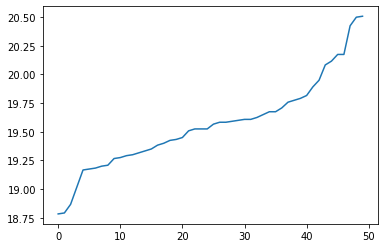

In [ ]:
### Naive solution: one elevator at a time

import random
from collections import Counter 
import scipy.stats
import matplotlib.pyplot as plt

def countDistinct(arr): 
    return len(Counter(arr).keys())     

total_list = []
trips_list = []
for x in range(50):
  ppl_list = [100, 120, 60, 120, 80, 20]
  time_list = []

  while True:
    nums_list = []
    r = 0
    while r < 10:
      rand_num = random.randint(0, 5)
      if ppl_list[rand_num] > 0:
        ppl_list[rand_num] -= 1
        nums_list.append(rand_num)
        r += 1

    if len(nums_list) == 0:
      break

    distinct = countDistinct(nums_list)
    biggest = max(nums_list)

    time = 15 + 10*distinct + 2*biggest*4
    time_list.append(time)

    go = True
    for u in ppl_list:
      if u != 0: 
        go = False

    if go:
      break

  total = 0
  for time in time_list:
    total += time

  total_list.append(total/4/60)

total_list.sort()
mean_val = sum(total_list)/len(total_list)
print(mean_val)
plt.plot(total_list)

In [ ]:
### More robust solution: Change the number of people in the ppl_list and change the number of elevators using elev_num

import random
from collections import Counter 
import scipy.stats
import matplotlib.pyplot as plt

def countDistinct(arr): 
    return len(Counter(arr).keys())     

def Finished(ppl_list):
    for u in ppl_list:
      if u != 0: 
        return False

    return True

def ElevatorProblem(ppl_list, elev_num, ppl_per_elev):
  time_list = []
  elev_list = [0 for i in range(elev_num)]

  while True:
    index = elev_list.index(min(elev_list))

    nums_list = []
    r = 0
    check = 0
    while r < ppl_per_elev:
      rand_num = random.randint(0, len(ppl_list)-1)
      if ppl_list[rand_num] > 0:
        ppl_list[rand_num] -= 1
        nums_list.append(rand_num)
        r += 1
      check += 1
      # Check in case too many
      if check > ppl_per_elev*2:
        if Finished(ppl_list):
          break

    ### Break if empty list
    if len(nums_list) == 0:
      break

    distinct = countDistinct(nums_list)
    biggest = max(nums_list)

    time = 15 + 10*distinct + 2*biggest*4
    elev_list[index] += time

    if Finished(ppl_list):
      break

  final_time = max(elev_list)
  return final_time

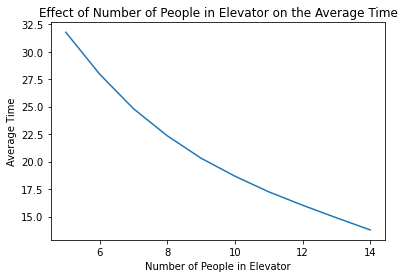

In [ ]:
total_list = []
for i in range(5, 15):
  tmp_list = []
  for x in range(50):
    ppl_list = [100, 120, 60, 120, 80, 20]
    tmp_list.append(ElevatorProblem(ppl_list, 4, i)/60)
  total_list.append(sum(tmp_list)/len(tmp_list))

plt.plot([n for n in range(5, 15)], total_list)
plt.xlabel("Number of People in Elevator")
plt.ylabel("Average Time")
plt.title("Effect of Number of People in Elevator on the Average Time")
plt.show()

20.234666666666662


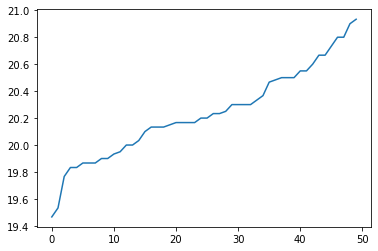

In [ ]:
elev_num = 4
ppl_per_elev = 9
total_list = []
for i in range(50):
  ppl_list = [100, 120, 60, 120, 80, 20]
  total_list.append(ElevatorProblem(ppl_list, elev_num, ppl_per_elev)/60)

total_list.sort()
plt.plot(total_list)
avg = sum(total_list)/len(total_list)
print(avg)

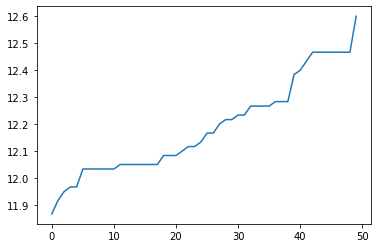

In [ ]:
elev_num = 4
ppl_per_elev = 10
total_list = []

for x in range(50):
  ppl_list = [100, 120, 60, 120, 80, 20]
    
  time_list = []
  elev_list = [0 for i in range(elev_num)]

  while True:
    index = elev_list.index(min(elev_list))

    #index 0 -> 1 & 3; 1 -> 2; 2 -> 4; 3 -> 5 & 6
    nums_list = []
    r = 0
    check = 0
    while r < ppl_per_elev:
      if index == 0 and (ppl_list[0] != 0 or ppl_list[2] != 0):
        rand_num = random.randint(0, 2)
      elif index == 1 and ppl_list[1] != 0:
        rand_num = 1
      elif index == 2 and ppl_list[3] != 0: 
        rand_num = 3
      elif index == 3 and (ppl_list[4] != 0 or ppl_list[5] != 0):
        rand_num = random.randint(4, 5)
      else:
        rand_num = random.randint(0, 5)

      if ppl_list[rand_num] > 0:
        ppl_list[rand_num] -= 1
        nums_list.append(rand_num)
        r += 1

      check += 1
      # Check in case too many
      if check > ppl_per_elev*2:
        if Finished(ppl_list):
          break

    ### Break if empty list
    if len(nums_list) == 0:
      break

    distinct = countDistinct(nums_list)
    biggest = max(nums_list)

    time = 15 + 10*distinct + 2*biggest*4
    elev_list[index] += time

    if Finished(ppl_list):
      break

  ans = max(elev_list)/60
  total_list.append(ans)

total_list.sort()
plt.plot(total_list)

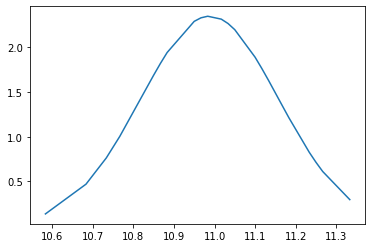

In [ ]:
import scipy.stats as stats
import numpy as np
hmean = np.mean(total_list)
hstd = np.std(total_list)
pdf = stats.norm.pdf(total_list, hmean, hstd)
plt.plot(total_list, pdf)